# ML Monitoring Fundamentals

## Setup

Required to run this notebook
- [Free WhyLabs Account](https://whylabs.ai/free)

Reference to whylogs:
- whylogs [GitHub](https://github.com/whylabs/whylogs/)





In [1]:
# Install whylogs
!pip install 'whylogs[viz]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.2/402.2 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.3/547.3 kB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.0 MB/s eta 0:00:00
  Created wheel for pybars3: filename=pybars3-0.9.7-py3-none-any.whl size=14082 sha256=c7857430e8b7a7044ada078d685e4c45f940689c7cb745c6559809ac56d38b15
  Stored in directory: /root/.cache/pip/wheels/2f/5b/65/505e94231d7dc278c9e0ddf8dbb1974cfb303eba742dbf55dd
  Created wheel for PyMeta3: filename=PyMeta3-0.5.1-py3-none-any.whl size=16449 sha256=c000b0efa7c1eebb8dd58dd23bddd82bf36c8d8b5af5f8bfab2ff3670f6eed78
  Stored in directory: /root/.cache/pip/wheels/f4/ef/62/1d388a1576d871760164a1388632b29645c3f907cd009d6cb1
Successfully built pybars3 PyMeta3



# 1. Data Drift, Model Drift, Performance


In [2]:
import whylogs as why
import numpy as np
import pandas as pd
import datetime
import os

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

pd.set_option("display.max_columns", None)

## Train a Machine Learning Model

In [3]:
df_iris = load_iris(as_frame=True)

print(list(df_iris.target_names))
print(list(df_iris.feature_names))

['setosa', 'versicolor', 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
# Train baseline Model
# KNN Model
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# Create feature and target data varaible
X, y = df_iris.data, df_iris.target

#create train & test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=6,
                                                    stratify=y)
# Train model
knn.fit(X_train, y_train)

# Predict the labels on test data sset
y_pred = knn.predict(X_test)

# Print model accuracy
knn.score(X_test, y_test)


0.9333333333333333

## Import batches of data

In [5]:
 # Import data batches
url = 'https://raw.githubusercontent.com/manifoldailearning/Complete-MLOps-BootCamp/main/ML-Monitoring-WhyLogs/datasets/iris_1_no_drift.csv'
batch_data_1 = pd.read_csv(url)

url2 = 'https://raw.githubusercontent.com/manifoldailearning/Complete-MLOps-BootCamp/main/ML-Monitoring-WhyLogs/datasets/iris_2_no_drift.csv'
batch_data_2 = pd.read_csv(url2)

url3 = 'https://raw.githubusercontent.com/manifoldailearning/Complete-MLOps-BootCamp/main/ML-Monitoring-WhyLogs/datasets/iris_3_no_drift.csv'
batch_data_3 = pd.read_csv(url3)

url4 = 'https://raw.githubusercontent.com/manifoldailearning/Complete-MLOps-BootCamp/main/ML-Monitoring-WhyLogs/datasets/iris_4_drift_0s.csv'
batch_data_4 = pd.read_csv(url4)

url5 = 'https://raw.githubusercontent.com/manifoldailearning/Complete-MLOps-BootCamp/main/ML-Monitoring-WhyLogs/datasets/iris_5_drift.csv'
batch_data_5 = pd.read_csv(url5)

url6 = 'https://raw.githubusercontent.com/manifoldailearning/Complete-MLOps-BootCamp/main/ML-Monitoring-WhyLogs/datasets/iris_6_drift.csv'
batch_data_6 = pd.read_csv(url6)

url7 = 'https://raw.githubusercontent.com/manifoldailearning/Complete-MLOps-BootCamp/main/ML-Monitoring-WhyLogs/datasets/iris_7_no_drift.csv'
batch_data_7 = pd.read_csv(url7)

# iris feature names
feature_names = ['sepal length (cm)', 'sepal width (cm)','petal length (cm)','petal width (cm)']

# separate targets
X_batch_1 = batch_data_1[feature_names]
X_batch_2 = batch_data_2[feature_names]
X_batch_3 = batch_data_3[feature_names]
X_batch_4 = batch_data_4[feature_names]
X_batch_5 = batch_data_5[feature_names]
X_batch_6 = batch_data_6[feature_names]
X_batch_7 = batch_data_7[feature_names]

y_batch_1 = batch_data_1['target']
y_batch_2 = batch_data_2['target']
y_batch_3 = batch_data_3['target']
y_batch_4 = batch_data_4['target']
y_batch_5 = batch_data_5['target']
y_batch_6 = batch_data_6['target']
y_batch_7 = batch_data_7['target']



dfs = [X_batch_1, X_batch_4, X_batch_5, X_batch_6, X_batch_2, X_batch_3, X_batch_7]

df_target = [y_batch_1, y_batch_4, y_batch_5, y_batch_6, y_batch_2, y_batch_3, y_batch_7]


In [6]:
X_batch_1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.5,3.2,1.5,-0.0
1,6.2,2.5,3.9,1.2
2,5.9,3.1,4.4,1.3
3,6.1,3.0,6.4,1.9
4,6.6,3.3,6.4,1.8
...,...,...,...,...
145,5.6,3.0,3.6,1.1
146,5.2,3.5,1.4,0.1
147,6.8,2.9,4.7,1.3
148,4.6,3.5,1.4,0.2


In [ ]:
dfs[0].head()

## Create a log with whylogs

whylogs is an open source library for logging any kind of data. With whylogs, users are able to generate summaries of their datasets (called whylogs profiles) which they can use to:

- Track changes in their dataset
- Create data constraints to know whether their data looks the way it should
- Quickly visualize key summary statistics about their datasets


![](https://user-images.githubusercontent.com/7946482/171062942-01c420f2-7768-4b7c-88b5-e3f291e1b7d8.png)

profiles generated with whylogs are:
- Efficient
- Customizable
- Mergeable


In [7]:
# create profile
profile1 = why.log(X_batch_1)

profile_view1 = profile1.view()
profile_view1.to_pandas()

⚠️ No session found. Call whylogs.init() to initialize a session and authenticate. See https://docs.whylabs.ai/docs/whylabs-whylogs-init for more information.


,cardinality/est,cardinality/lower_1,cardinality/upper_1,counts/inf,counts/n,counts/nan,counts/null,distribution/max,distribution/mean,distribution/median,distribution/min,distribution/n,distribution/q_01,distribution/q_05,distribution/q_10,distribution/q_25,distribution/q_75,distribution/q_90,distribution/q_95,distribution/q_99,distribution/stddev,type,types/boolean,types/fractional,types/integral,types/object,types/string,types/tensor
column,,,,,,,,,,,,,,,,,,,,,,,,,,,,
petal length (cm),42.000004,42.0,42.002101,0,150,0,0,6.8,3.775333,4.2,1.0,150,1.1,1.3,1.4,1.5,5.3,5.9,6.3,6.6,1.800669,SummaryType.COLUMN,0,150,0,0,0,0
petal width (cm),24.000001,24.0,24.001200,0,150,0,0,2.5,1.168667,1.3,-0.0,150,0.0,0.1,0.2,0.3,1.8,2.2,2.3,2.4,0.758499,SummaryType.COLUMN,0,150,0,0,0,0
sepal length (cm),35.000003,35.0,35.001750,0,150,0,0,8.1,5.856000,5.8,4.0,150,4.3,4.5,4.8,5.1,6.6,7.0,7.2,7.7,0.874277,SummaryType.COLUMN,0,150,0,0,0,0
sepal width (cm),20.000001,20.0,20.001000,0,150,0,0,4.4,3.100000,3.0,2.1,150,2.3,2.5,2.6,2.8,3.3,3.6,3.8,4.4,0.417567,SummaryType.COLUMN,0,150,0,0,0,0


## Writing profiles to WhyLabs

We're going start with an example of using profiles with the WhyLabs Observatory.

We'll explore using whylogs for data validation & drift visualization after this!


## Get WhyLabs access tokens [expand]





Before integrate our data into WhyLabs we need three things:
- WhyLabs API Key
- WhyLabs Org-ID
- Project-ID


The easiest way to get the API token & ord-id:

`Menu -> Settings -> Access Tokens`

![](https://github.com/sagecodes/workshop-images/blob/master/access_token_org.png?raw=true)


## Sending profiles

In [8]:
# set authentication & project keys
os.environ["WHYLABS_DEFAULT_ORG_ID"] = 'org-rdPzFz'
os.environ["WHYLABS_API_KEY"] = '0i5kZlwGRb.73uO8b58QkbGh8SzEMFjt8SOEv1YSHeX3pN4gIp5vXhvA9avpwzCn:org-rdPzFz'
os.environ["WHYLABS_DEFAULT_DATASET_ID"] = 'model-4'

In [9]:
from whylogs.api.writer.whylabs import WhyLabsWriter

In [10]:
# Single Profile
writer = WhyLabsWriter()
profile= why.log(X_batch_1)
writer.write(file=profile.view())

⚠️ Initializing default session because no session was found.
Initializing session with config /root/.config/whylogs/config.ini

✅ Using session type: LOCAL. Profiles won't be uploaded or written anywhere automatically.


(True, 'log-mjxGtsWGm7me5m1M')

Write multiple profiles with different dates to backfill

In [11]:
# initialize writer
writer = WhyLabsWriter()

# back fill 1 day per batch
for i, df in enumerate(dfs):

    # walking backwards. Each dataset has to map to a date to show up as a different batch in WhyLabs
    dt = datetime.datetime.now(tz=datetime.timezone.utc) - datetime.timedelta(days=i)

    # create profile for each batch of data
    profile = why.log(df).profile()

    # set the dataset timestamp for the profile
    profile.set_dataset_timestamp(dt)
    # write the profile to the WhyLabs platform
    writer.write(file=profile.view())

Reference Profile

In [12]:
ref_profile = why.log(df_iris.data).profile()
writer = WhyLabsWriter().option(reference_profile_name="iris_training_profile")
writer.write(file=ref_profile.view())

(True, 'ref-HZ3orEZ8GnI3bJY8')

## Logging output

In [13]:
# Get predictions with model & append to df
pred_dfs = dfs

class_names = ['setosa', 'versicolor', 'virginica']

for i, df in enumerate(pred_dfs):
    y_pred = knn.predict(df)
    y_prob = knn.predict_proba(df)
    pred_scores = []
    pred_classes = []

    for pred in y_pred:
      pred_classes.append(class_names[pred])
    df['cls_output'] = pred_classes
    for prob in y_prob:
      pred_scores.append(max(prob))
    df['prob_output'] = pred_scores
    # print(pred_scores)

<ipython-input-13-80c1d22fcdbe>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cls_output'] = pred_classes
<ipython-input-13-80c1d22fcdbe>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prob_output'] = pred_scores


In [14]:
pred_dfs[-1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cls_output,prob_output
0,5.2,2.9,1.2,0.3,setosa,1.0
1,5.5,2.6,4.5,1.2,versicolor,1.0
2,6.2,3.5,3.4,1.5,versicolor,1.0
3,5.0,3.4,1.5,0.1,setosa,1.0
4,5.3,3.2,1.3,0.3,setosa,1.0
...,...,...,...,...,...,...
145,4.7,3.2,5.1,1.1,versicolor,1.0
146,6.7,3.3,4.9,2.3,virginica,0.8
147,4.9,2.7,1.4,0.2,setosa,1.0
148,5.6,3.0,5.0,1.5,versicolor,0.6


In [15]:
writer = WhyLabsWriter()

for i, df in enumerate(pred_dfs):

    out_df = df[['cls_output', 'prob_output']].copy()
   # walking backwards. Each dataset has to map to a date to show up as a different batch in WhyLabs
    dt = datetime.datetime.now(tz=datetime.timezone.utc) - datetime.timedelta(days=i)
    profile = why.log(out_df).profile()

    # set the dataset timestamp for the profile
    profile.set_dataset_timestamp(dt)
    #write the profile to the WhyLabs platform
    writer.write(file=profile.view())

## Log performance

Instead of just logging outputs, if we have ground truth data we can also monitor performance metrics overtime.


Classification:

Regression:


In [ ]:
pred_dfs[-1]

In [18]:
# Append ground truth data to dataframe
for i, df in enumerate(pred_dfs):
    df['ground_truth'] = df_target[i]

In [ ]:
pred_dfs[0]

In [19]:
# Log performance

for i, df in enumerate(pred_dfs):

  results = why.log_classification_metrics(
          df,
          target_column = "ground_truth",
          prediction_column = "cls_output",
          score_column="prob_output"
      )
   # walking backwards. Each dataset has to map to a date to show up as a different batch in WhyLabs
  dt = datetime.datetime.now(tz=datetime.timezone.utc) - datetime.timedelta(days=i)

  profile = results.profile()
  profile.set_dataset_timestamp(dt)

  results.writer("whylabs").write()

# 2. Monitoring for Bias & Fairness with Tracing & Explainability



In [20]:
# Imports
import whylogs as why
import numpy as np
import pandas as pd
import datetime
import os

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

pd.set_option("display.max_columns", None)

In [21]:
# Load iris data as dataframe(df)
df_iris = load_iris(as_frame=True)

print(list(df_iris.target_names))
print(list(df_iris.feature_names))

['setosa', 'versicolor', 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## Train a Machine Learning Model (quickly)

In [22]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

X, y = df_iris.data, df_iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)
# Train model
knn.fit(X_train, y_train)

# Predict the labels on test data sset
y_pred = knn.predict(X_test)

# Print model accuracy
knn.score(X_test, y_test)

0.9777777777777777

## Import data batches

In [23]:
 # Import data batches
url = 'https://raw.githubusercontent.com/manifoldailearning/Complete-MLOps-BootCamp/main/ML-Monitoring-WhyLogs/datasets/iris_8_statefl_1.csv'
batch_data_1 = pd.read_csv(url)

url2 = 'https://raw.githubusercontent.com/manifoldailearning/Complete-MLOps-BootCamp/main/ML-Monitoring-WhyLogs/datasets/iris_9_statefl_1.csv'
batch_data_2 = pd.read_csv(url2)

url3 = 'https://raw.githubusercontent.com/manifoldailearning/Complete-MLOps-BootCamp/main/ML-Monitoring-WhyLogs/datasets/iris_10_statefl_1.csv'
batch_data_3 = pd.read_csv(url3)

url4 = 'https://raw.githubusercontent.com/manifoldailearning/Complete-MLOps-BootCamp/main/ML-Monitoring-WhyLogs/datasets/iris_11_statefl_1.csv'
batch_data_4 = pd.read_csv(url4)

url5 = 'https://raw.githubusercontent.com/manifoldailearning/Complete-MLOps-BootCamp/main/ML-Monitoring-WhyLogs/datasets/iris_12_statefl_1.csv'
batch_data_5 = pd.read_csv(url5)

url6 = 'https://raw.githubusercontent.com/manifoldailearning/Complete-MLOps-BootCamp/main/ML-Monitoring-WhyLogs/datasets/iris_13_statefl_1.csv'
batch_data_6 = pd.read_csv(url6)

url7 = 'https://raw.githubusercontent.com/manifoldailearning/Complete-MLOps-BootCamp/main/ML-Monitoring-WhyLogs/datasets/iris_14_statefl_1.csv'
batch_data_7 = pd.read_csv(url7)

# iris feature names
feature_names = ['sepal length (cm)', 'sepal width (cm)','petal length (cm)','petal width (cm)', 'state']

# separate targets
X_batch_1 = batch_data_1[feature_names]
X_batch_2 = batch_data_2[feature_names]
X_batch_3 = batch_data_3[feature_names]
X_batch_4 = batch_data_4[feature_names]
X_batch_5 = batch_data_5[feature_names]
X_batch_6 = batch_data_6[feature_names]
X_batch_7 = batch_data_7[feature_names]

# We'll save the target values for later!
y_batch_1 = batch_data_1['target']
y_batch_2 = batch_data_2['target']
y_batch_3 = batch_data_3['target']
y_batch_4 = batch_data_4['target']
y_batch_5 = batch_data_5['target']
y_batch_6 = batch_data_6['target']
y_batch_7 = batch_data_7['target']


# create list of our batches
dfs = [X_batch_1, X_batch_4, X_batch_5, X_batch_6, X_batch_2, X_batch_3, X_batch_7]

df_target = [y_batch_1, y_batch_4, y_batch_5, y_batch_6, y_batch_2, y_batch_3, y_batch_7]


In [28]:
dfs[0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),state,cls_output,prob_output
0,4.9,4.0,1.6,0.3,Karnataka,setosa,1.0
1,4.9,3.5,1.3,0.1,Karnataka,setosa,1.0
2,5.9,3.0,5.1,1.3,Karnataka,versicolor,0.8
3,5.2,3.3,1.6,0.3,Karnataka,setosa,1.0
4,4.6,3.2,1.2,0.3,Karnataka,setosa,1.0



## Creating profiles with whylogs


Profiles generated with whylogs are:

- Secure
- Efficient
- Customizable
- Mergeable

In [24]:
# create profile
profile1 = why.log(X_batch_1)

profile_view1 = profile1.view()
profile_view1.to_pandas()

,cardinality/est,cardinality/lower_1,cardinality/upper_1,counts/inf,counts/n,counts/nan,counts/null,distribution/max,distribution/mean,distribution/median,distribution/min,distribution/n,distribution/q_01,distribution/q_05,distribution/q_10,distribution/q_25,distribution/q_75,distribution/q_90,distribution/q_95,distribution/q_99,distribution/stddev,type,types/boolean,types/fractional,types/integral,types/object,types/string,types/tensor,frequent_items/frequent_strings
column,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
petal length (cm),49.000006,49.0,49.002452,0,150,0,0,7.5,4.041333,4.3,1.1,150,1.1,1.3,1.5,2.4,5.4,6.2,6.8,7.5,1.776664,SummaryType.COLUMN,0,150,0,0,0,0,NaN
petal width (cm),24.000001,24.0,24.001200,0,150,0,0,2.7,1.207333,1.3,0.0,150,0.1,0.1,0.2,0.3,1.9,2.2,2.4,2.5,0.769651,SummaryType.COLUMN,0,150,0,0,0,0,NaN
sepal length (cm),33.000003,33.0,33.001650,0,150,0,0,7.7,5.856000,5.8,4.2,150,4.2,4.7,4.9,5.1,6.5,7.1,7.2,7.7,0.847775,SummaryType.COLUMN,0,150,0,0,0,0,NaN
sepal width (cm),19.000001,19.0,19.000950,0,150,0,0,4.0,2.996000,2.9,2.2,150,2.2,2.3,2.4,2.7,3.3,3.6,3.8,4.0,0.448395,SummaryType.COLUMN,0,150,0,0,0,0,NaN
state,3.000000,3.0,3.000150,0,150,0,0,NaN,0.000000,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,SummaryType.COLUMN,0,0,0,0,150,0,"[FrequentItem(value='Karnataka', est=50, upper..."


In [29]:
# set authentication & project keys
# os.environ["WHYLABS_DEFAULT_ORG_ID"] = 'ORGID'
# os.environ["WHYLABS_API_KEY"] = 'APIKEY'
os.environ["WHYLABS_DEFAULT_DATASET_ID"] = 'model-5'

### Create dataframe with model predictions

In [26]:
# Get predictions with model & append to df
pred_dfs = dfs

class_names = ['setosa', 'versicolor', 'virginica']

for i, df in enumerate(pred_dfs):
    y_pred = knn.predict(df.iloc[:, :4])
    y_prob = knn.predict_proba(df.iloc[:, :4])
    pred_scores = []
    pred_classes = []

    for pred in y_pred:
      pred_classes.append(class_names[pred])
    df['cls_output'] = pred_classes
    for prob in y_prob:
      pred_scores.append(max(prob))
    df['prob_output'] = pred_scores

In [27]:
pred_dfs[-1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),state,cls_output,prob_output
0,5.5,2.9,4.4,1.2,Karnataka,versicolor,1.0
1,4.7,3.1,1.3,0.3,Karnataka,setosa,1.0
2,4.7,3.0,1.4,0.2,Karnataka,setosa,1.0
3,5.2,3.7,1.4,0.3,Karnataka,setosa,1.0
4,6.8,3.2,6.2,1.6,Karnataka,virginica,1.0
...,...,...,...,...,...,...,...
145,5.9,3.0,5.8,2.6,Tamilnadu,virginica,1.0
146,4.8,2.3,3.7,1.4,Tamilnadu,versicolor,1.0
147,5.3,2.7,4.3,1.3,Tamilnadu,versicolor,1.0
148,5.8,3.2,5.7,1.9,Tamilnadu,virginica,1.0


### Backfilling data in WhyLabs

In [31]:
from whylogs.core.schema import DatasetSchema
from whylogs.core.segmentation_partition import segment_on_column

In [32]:
# back fill 1 day per batch
for i, df in enumerate(pred_dfs):
    # walking backwards. Each dataset has to map to a date to show up as a different batch in WhyLabs
    dt = datetime.datetime.now(tz=datetime.timezone.utc) - datetime.timedelta(days=i)

    # create profile for each batch of data
    profile = why.log(df, schema=DatasetSchema(segments=segment_on_column("state")))

    # set the dataset timestamp for the profile
    profile.set_dataset_timestamp(dt)
    # write the profile to the WhyLabs platform
    profile.writer("whylabs").write()

Learn more about segmentation in whylogs
- [Intro to Segmentation with whylogs](https://github.com/whylabs/whylogs/blob/mainline/python/examples/advanced/Segments.ipynb)

In [33]:
# Create reference profile
ref_profile = why.log(df_iris.data).profile()
writer = WhyLabsWriter().option(reference_profile_name="iris_training_profile")
writer.write(file=ref_profile.view())

(True, 'ref-7RraK15QQb2hm8v4')

###Classification Performance Metrics

In [34]:
# Append ground truth data to dataframe
for i, df in enumerate(pred_dfs):
    df['ground_truth'] = df_target[i]

In [35]:
pred_dfs[0]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),state,cls_output,prob_output,ground_truth
0,4.9,4.0,1.6,0.3,Karnataka,setosa,1.0,setosa
1,4.9,3.5,1.3,0.1,Karnataka,setosa,1.0,setosa
2,5.9,3.0,5.1,1.3,Karnataka,versicolor,0.8,versicolor
3,5.2,3.3,1.6,0.3,Karnataka,setosa,1.0,setosa
4,4.6,3.2,1.2,0.3,Karnataka,setosa,1.0,setosa
...,...,...,...,...,...,...,...,...
145,6.0,2.9,6.6,2.0,Tamilnadu,virginica,1.0,virginica
146,5.3,3.0,1.6,0.1,Tamilnadu,setosa,1.0,setosa
147,5.6,2.3,4.2,1.2,Tamilnadu,versicolor,1.0,versicolor
148,5.3,3.1,1.4,0.3,Tamilnadu,setosa,1.0,setosa


In [36]:
from whylogs import log_classification_metrics
# from whylogs.core.schema import DatasetSchema
# from whylogs.core.segmentation_partition import segment_on_column

In [37]:
for i, df in enumerate(pred_dfs):

  segmented_classification_results = log_classification_metrics(
    df,
    target_column = "ground_truth",
    prediction_column = "cls_output",
    schema = DatasetSchema(segments=segment_on_column("state"))
  )
   # walking backwards. Each dataset has to map to a date to show up as a different batch in WhyLabs
  dt = datetime.datetime.now(tz=datetime.timezone.utc) - datetime.timedelta(days=i)

  # profile = segmented_classification_results.profile()
  segmented_classification_results.set_dataset_timestamp(dt)

  segmented_classification_results.writer("whylabs").write()

## Feature importance

Learn more about SHAP
https://github.com/slundberg/shap

In [38]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.0 MB/s eta 0:00:00


In [39]:
import shap

In [40]:
explainer = shap.Explainer(knn.predict, X_train)

In [41]:
shap_values = explainer(X_test)

ExactExplainer explainer: 46it [00:24,  1.29it/s]


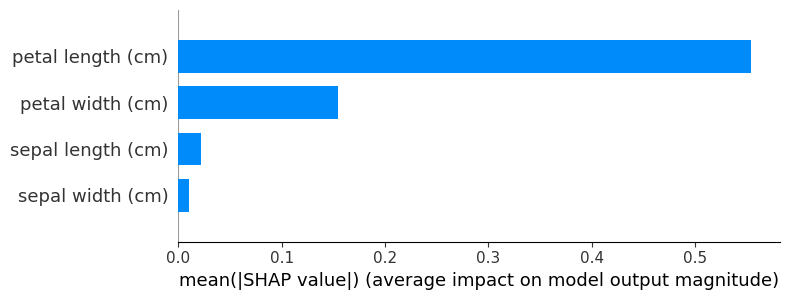

In [42]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [43]:
# Get global featue importance
shap_feature_importance = np.mean(np.abs(shap_values.values), axis=0)

In [44]:
# Create dict with feature importance
shap_feature_importance_dict = dict(zip(X_train.columns.tolist(), shap_feature_importance.tolist()))
feature_importance_dict = {k: v for k, v in sorted(shap_feature_importance_dict.items(),
                                                   key=lambda item: item[1], reverse=True)}


In [45]:
print(feature_importance_dict)

{'petal length (cm)': 0.5544259259259259, 'petal width (cm)': 0.15472222222222223, 'sepal length (cm)': 0.021944444444444444, 'sepal width (cm)': 0.010351851851851846}


In [46]:
# Write values to WhyLabs
from whylogs.core.feature_weights import FeatureWeights
from whylogs.api.writer.whylabs import WhyLabsWriter

feature_weights = FeatureWeights(shap_feature_importance_dict)
result = feature_weights.writer("whylabs").write()

result

(True, '200')

# 3. Open-source data & ML monitoring with whylogs

## Using data drift reports with whylogs in a Python environment

![](https://whylabs.ai/_next/image?url=https%3A%2F%2Fcontent.whylabs.ai%2Fcontent%2Fimages%2F2022%2F06%2FTDSImage3.jpeg&w=3120&q=75)








In [47]:
# create profiles of batches

profile_view1 = why.log(X_batch_1).view()
profile_view1 = why.log(X_batch_1).view()
profile_view2 = why.log(X_batch_2).view()
profile_view3 = why.log(X_batch_3).view()
profile_view4 = why.log(batch_data_4).view()
profile_view5 = why.log(batch_data_5).view()
profile_view6 = why.log(batch_data_6).view()
profile_view7 = why.log(X_batch_7).view()

In [50]:
# Data Drift with whylogs
from whylogs.viz import NotebookProfileVisualizer

visualization = NotebookProfileVisualizer()
visualization.set_profiles(target_profile_view=profile_view1, reference_profile_view=profile_view3)

In [51]:
visualization.summary_drift_report()

In [52]:
visualization.double_histogram(feature_name="petal width (cm)")

In [53]:
visualization.double_histogram(feature_name="petal length (cm)")

In [55]:

from whylogs.viz.drift.column_drift_algorithms import calculate_drift_scores

scores = calculate_drift_scores(target_view=profile_view1, reference_view=profile_view3, with_thresholds = True)

scores

{'sepal length (cm)': {'algorithm': 'ks',
  'pvalue': 0.9993989748100714,
  'statistic': 0.040000000000000036,
  'thresholds': {'NO_DRIFT': (0.15, 1),
   'POSSIBLE_DRIFT': (0.05, 0.15),
   'DRIFT': (0, 0.05)},
  'drift_category': 'NO_DRIFT'},
 'sepal width (cm)': {'algorithm': 'ks',
  'pvalue': 0.02735101939658672,
  'statistic': 0.16666666666666666,
  'thresholds': {'NO_DRIFT': (0.15, 1),
   'POSSIBLE_DRIFT': (0.05, 0.15),
   'DRIFT': (0, 0.05)},
  'drift_category': 'DRIFT'},
 'petal length (cm)': {'algorithm': 'ks',
  'pvalue': 0.8705694824192632,
  'statistic': 0.06666666666666665,
  'thresholds': {'NO_DRIFT': (0.15, 1),
   'POSSIBLE_DRIFT': (0.05, 0.15),
   'DRIFT': (0, 0.05)},
  'drift_category': 'NO_DRIFT'},
 'petal width (cm)': {'algorithm': 'ks',
  'pvalue': 0.5012483279116242,
  'statistic': 0.09333333333333332,
  'thresholds': {'NO_DRIFT': (0.15, 1),
   'POSSIBLE_DRIFT': (0.05, 0.15),
   'DRIFT': (0, 0.05)},
  'drift_category': 'NO_DRIFT'},
 'state': {'algorithm': 'chi-square

In [56]:
# Compare Another profiles:

from whylogs.viz import NotebookProfileVisualizer

visualization = NotebookProfileVisualizer()
visualization.set_profiles(target_profile_view=profile_view1, reference_profile_view=profile_view6)

In [57]:
visualization.summary_drift_report()

In [58]:
visualization.double_histogram(feature_name="petal length (cm)")


In [59]:
visualization.double_histogram(feature_name="petal width (cm)")


In [60]:

from whylogs.viz.drift.column_drift_algorithms import calculate_drift_scores

scores = calculate_drift_scores(target_view=profile_view1, reference_view=profile_view6, with_thresholds = True)

scores

{'sepal length (cm)': {'algorithm': 'ks',
  'pvalue': 0.8705694824192632,
  'statistic': 0.06666666666666665,
  'thresholds': {'NO_DRIFT': (0.15, 1),
   'POSSIBLE_DRIFT': (0.05, 0.15),
   'DRIFT': (0, 0.05)},
  'drift_category': 'NO_DRIFT'},
 'sepal width (cm)': {'algorithm': 'ks',
  'pvalue': 0.5954828994436333,
  'statistic': 0.08666666666666673,
  'thresholds': {'NO_DRIFT': (0.15, 1),
   'POSSIBLE_DRIFT': (0.05, 0.15),
   'DRIFT': (0, 0.05)},
  'drift_category': 'NO_DRIFT'},
 'petal length (cm)': {'algorithm': 'ks',
  'pvalue': 0.9350098413338493,
  'statistic': 0.05999999999999994,
  'thresholds': {'NO_DRIFT': (0.15, 1),
   'POSSIBLE_DRIFT': (0.05, 0.15),
   'DRIFT': (0, 0.05)},
  'drift_category': 'NO_DRIFT'},
 'petal width (cm)': {'algorithm': 'ks',
  'pvalue': 0.9350098413338488,
  'statistic': 0.06,
  'thresholds': {'NO_DRIFT': (0.15, 1),
   'POSSIBLE_DRIFT': (0.05, 0.15),
   'DRIFT': (0, 0.05)},
  'drift_category': 'NO_DRIFT'},
 'state': {'algorithm': 'chi-square',
  'pvalue':

Learn more about using data drift reports with whylogs
- [Drift Algorithm Configuration](https://github.com/whylabs/whylogs/blob/mainline/python/examples/advanced/Drift_Algorithm_Configuration.ipynb)



## Data validation with constraints in whylogs


Data quality validation ensures data is structured and falls in the range expected for our data pipelines or applications. When collecting or using data it’s important to verify the quality to avoid unwanted machine learning behavior in production, such as errors or faulty prediction results.

For example, we may want to ensure our data doesn’t contain any empty or negative values before moving it along in the pipeline if our model does not expect those values.

In [61]:
# Data Quality Validation whylogs

from whylogs.core.constraints import (Constraints,
                                     ConstraintsBuilder,
                                     MetricsSelector,
                                     MetricConstraint)

In [62]:
# Using Constraints for Data Quality Validation

def validate_features(profile_view, verbose=False):

  builder = ConstraintsBuilder(profile_view)

  # Define a constraint for validating data
  builder.add_constraint(MetricConstraint(
    name="petal length > 0 and < 15",
    condition=lambda x: x.min > 0 and x.max < 15,
    metric_selector=MetricsSelector(metric_name='distribution',
                                    column_name='petal length (cm)')
  ))

  builder.add_constraint(MetricConstraint(
    name="petal width > 0 and < 15",
    condition=lambda x: x.min > 0 and x.max < 15,
    metric_selector=MetricsSelector(metric_name='distribution',
                                    column_name='petal width (cm)')
  ))

  builder.add_constraint(MetricConstraint(
    name="sepal length > 0 and < 15",
    condition=lambda x: x.min > 0 and x.max < 15 ,
    metric_selector=MetricsSelector(metric_name='distribution',
                                    column_name='sepal length (cm)')
  ))

  builder.add_constraint(MetricConstraint(
    name="sepal width > 0 and < 15",
    condition=lambda x: x.min > 0 and x.max < 15,
    metric_selector=MetricsSelector(metric_name='distribution',
                                    column_name='sepal width (cm)')
  ))

  # Build the constraints and return the report
  constraints: Constraints = builder.build()

  if verbose:
    print(constraints.report())

  # return constraints.report()
  return constraints


In [63]:
const = validate_features(profile_view2, True)

[('petal length > 0 and < 15', 1, 0), ('petal width > 0 and < 15', 1, 0), ('sepal length > 0 and < 15', 1, 0), ('sepal width > 0 and < 15', 1, 0)]


Please use generate_constraints_report()


In [64]:
from whylogs.viz import NotebookProfileVisualizer
visualization = NotebookProfileVisualizer()
visualization.constraints_report(const, cell_height=300)

In [65]:
# check all constraints for passing:
constraints_valid = const.validate()
print(constraints_valid)

True


In [66]:
const = validate_features(profile_view4, True)

[('petal length > 0 and < 15', 1, 0), ('petal width > 0 and < 15', 0, 1), ('sepal length > 0 and < 15', 1, 0), ('sepal width > 0 and < 15', 1, 0)]


Please use generate_constraints_report()


In [67]:
visualization = NotebookProfileVisualizer()
visualization.constraints_report(const, cell_height=300)

In [68]:
# check all constraints for passing:
constraints_valid = const.validate()
print(constraints_valid)

False


In [69]:
profile_view4.to_pandas()

,cardinality/est,cardinality/lower_1,cardinality/upper_1,counts/inf,counts/n,counts/nan,counts/null,distribution/max,distribution/mean,distribution/median,distribution/min,distribution/n,distribution/q_01,distribution/q_05,distribution/q_10,distribution/q_25,distribution/q_75,distribution/q_90,distribution/q_95,distribution/q_99,distribution/stddev,type,types/boolean,types/fractional,types/integral,types/object,types/string,types/tensor,frequent_items/frequent_strings
column,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
petal length (cm),48.000006,48.0,48.002402,0,150,0,0,7.7,4.106667,4.6,1.2,150,1.2,1.4,1.4,2.3,5.6,6.0,6.5,7.6,1.818277,SummaryType.COLUMN,0,150,0,0,0,0,NaN
petal width (cm),23.000001,23.0,23.001150,0,150,0,0,2.5,1.186667,1.3,0.0,150,0.1,0.2,0.2,0.3,1.9,2.1,2.3,2.5,0.745696,SummaryType.COLUMN,0,150,0,0,0,0,NaN
sepal length (cm),36.000003,36.0,36.001801,0,150,0,0,8.3,5.872000,5.9,4.4,150,4.4,4.6,4.7,5.1,6.5,7.1,7.5,7.9,0.891957,SummaryType.COLUMN,0,150,0,0,0,0,NaN
sepal width (cm),23.000001,23.0,23.001150,0,150,0,0,4.3,3.075333,3.0,2.1,150,2.2,2.5,2.6,2.7,3.4,3.6,3.9,4.2,0.438107,SummaryType.COLUMN,0,150,0,0,0,0,NaN
state,3.000000,3.0,3.000150,0,150,0,0,NaN,0.000000,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,SummaryType.COLUMN,0,0,0,0,150,0,"[FrequentItem(value='Karnataka', est=50, upper..."
target,3.000000,3.0,3.000150,0,150,0,0,NaN,0.000000,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,SummaryType.COLUMN,0,0,0,0,150,0,"[FrequentItem(value='virginica', est=50, upper..."


Leran more about performing data validation with whylogs
- [Data Validation with Metric Constraints](https://github.com/whylabs/whylogs/blob/mainline/python/examples/advanced/Metric_Constraints.ipynb)
